In [2]:
# Just used to adjust the way the notebook is displayed
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [93]:
# Import used libraries 
import pandas as pd
import numpy as np 
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy.stats import norm
from collections import Counter
from sklearn.feature_selection import chi2
from scipy import stats

In [11]:
# Adjust visualizations appearance 
sns.set_theme(style="darkgrid",palette="Set2",context="talk") #style="darkgrid"

In [12]:
# Adjust visualizations appearance 
plt.rcParams.update({
    "figure.facecolor":    (.776, .776, .776, 1)
})

In [6]:
# Read data source into Pandas dataframe 
df = pd.read_csv('archive/heart_2020_cleaned.csv') 

In [7]:
# Display dataframe
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [8]:
# Create list of all binary features and make dataframes for each 
binary_df_list = []
binary_col_names = []
for col in df.columns:
    if len(pd.unique(df[col])) == 2:
        binary_col_names.append(col)
        # Adds dataframes for each binary feature, each has two rows that contain the counts of each binary value for that feature. Example shown in next cell 
        binary_df_list.append(df[col].value_counts().to_frame().reset_index())  

In [89]:
binary_df_list[0]

,index,HeartDisease
0,No,292422
1,Yes,27373


In [9]:
# Creating titles for visualizations in the next cell
titles_dict = {'HeartDisease': 'Have You Ever Had Heart Desease?', 
               'Smoking': 'Have You Smoked at Least 100 \n Cigarettes in Your Entire Life?', 
               'AlcoholDrinking': 'Men: Do You Have More Than 14 Drinks Per Week? \n Women: Do You Have More Than 7 Drinks Per Week?', 
               'Stroke': 'Have You Ever Had a Stroke?', 
               'DiffWalking': 'Do You Have Serious Difficulty \n Walking or Climbing Stairs?', 
               'Sex': 'Are You Male or Female?', 
               'PhysicalActivity': 'Have You Done Exercise During the \n Past 30 Days Other Than Your Regular Job?', 
               'Asthma': 'Have You Ever Had Asthma?', 
               'KidneyDisease': 'Have You Ever Had Kidney Disease?', 
               'SkinCancer': 'Have You Ever Had Skin Cancer?'}

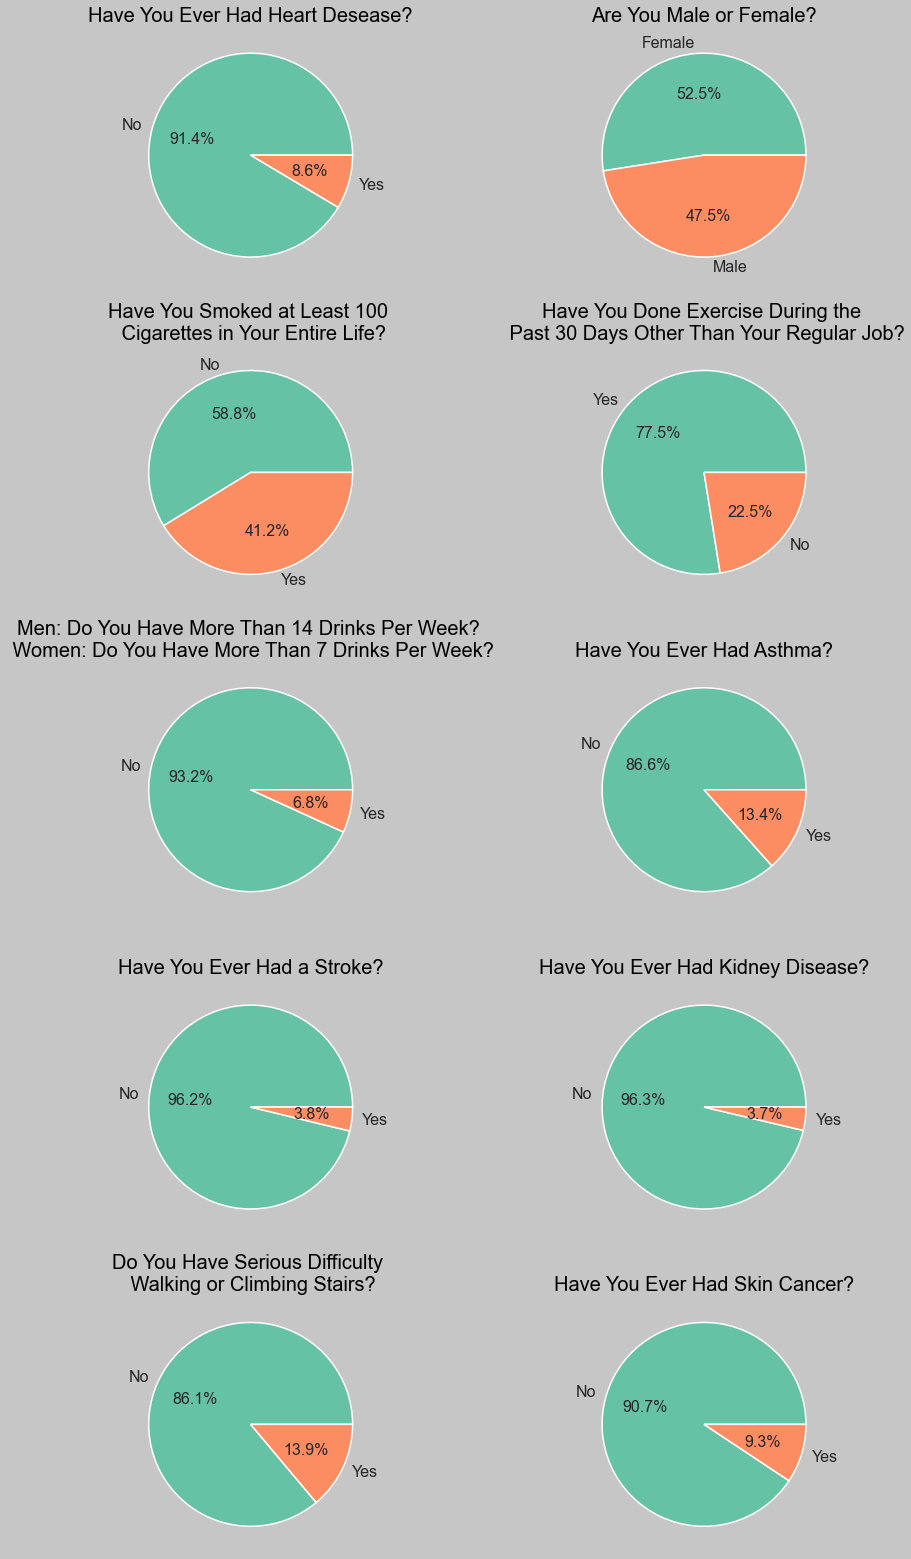

In [91]:
fig, axs = plt.subplots(5, 2, figsize=(15, 22))
axs_col = 0
axs_row = 0
# Iterate over dataframes and create a pie chart for each
for i in range(len(binary_df_list)):
    binary_df = binary_df_list[i]
    size_col = binary_col_names[i]
    sizes = binary_df[size_col]
    labels = binary_df['index']
    patches, texts, autotexts  = axs[axs_row, axs_col].pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 16})
    axs[axs_row, axs_col].set_title(titles_dict[size_col], color='k', fontdict={'fontsize': 20})  
    axs_row += 1 
    if (axs_row+1)%5 == 0:
        axs_row -= 5
    if (i+1)%5 == 0:
        axs_col += 1
fig.tight_layout()

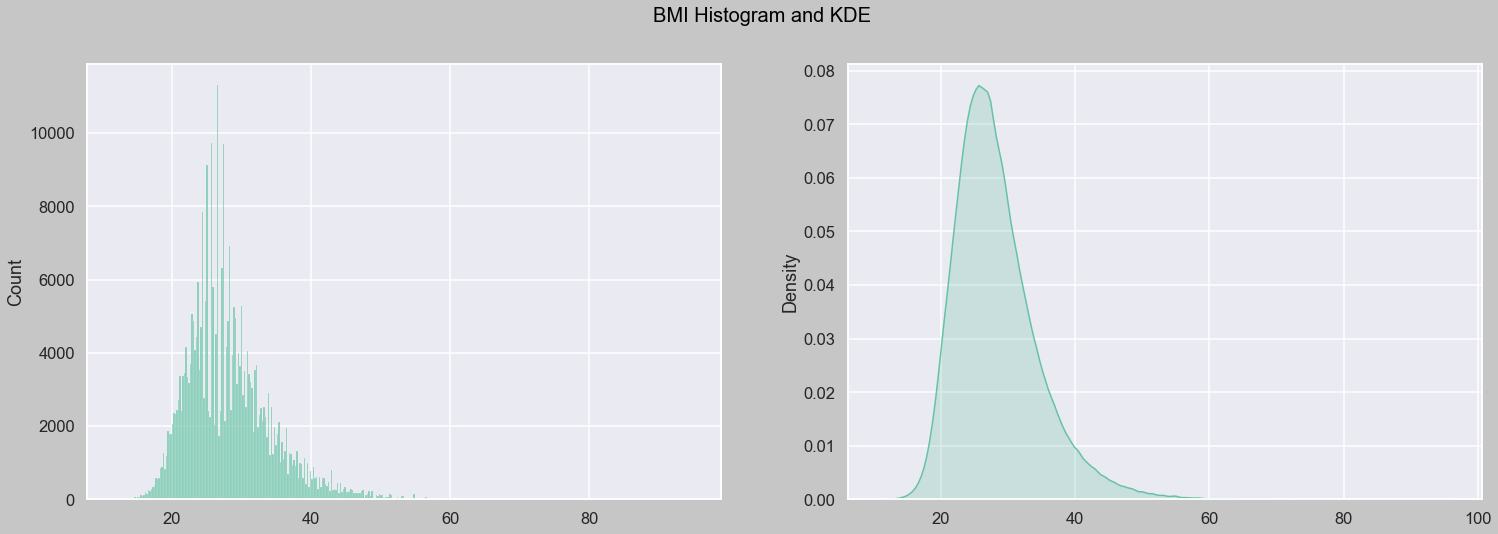

In [15]:
bmi_array = np.array(df['BMI'])

fig, axs = plt.subplots(1, 2, figsize=(25, 8))
fig.suptitle('BMI Histogram and KDE', color='k', size=20)
sns.histplot(x=bmi_array, ax=axs[0])
sns.kdeplot(x=bmi_array, ax=axs[1], fill=True)

plt.show()

In [98]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

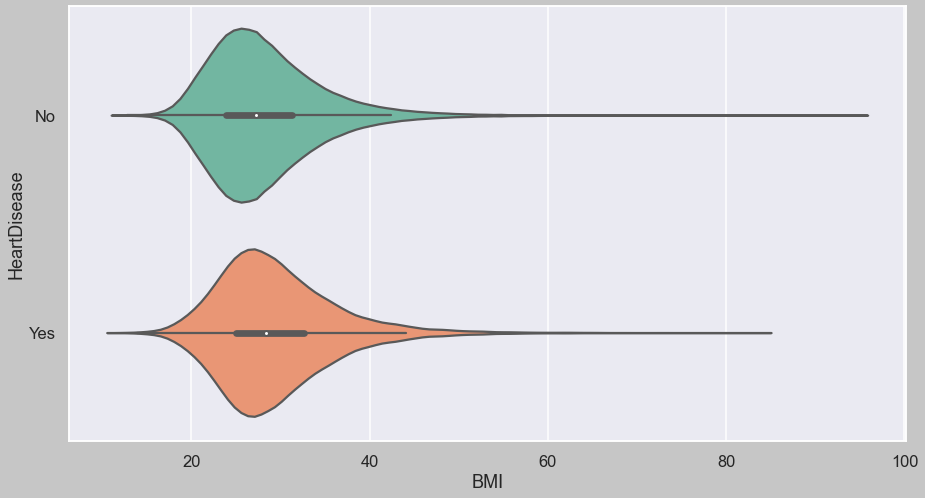

In [16]:
sns.violinplot(data=df, x="BMI", y="HeartDisease")
plt.gcf().set_size_inches(15, 8)

In [87]:
bmi_no_hd = df[df['HeartDisease']=='No']['BMI']
bmi_yes_hd = df[df['HeartDisease']=='Yes']['BMI']

print('The average BMI of respondents with heart disease is: {} \nThe average BMI of respondents without heart disease is: {}'.format(bmi_no_hd.mean(),bmi_yes_hd.mean()))

The average BMI of respondents with heart disease is: 28.22465833623946 
The average BMI of respondents without heart disease is: 29.40159207978655


In [88]:
# Do a t-test to see if the mean BMI for people with and without heart disease is the same
stats.ttest_ind(bmi_no_hd, bmi_yes_hd)

Ttest_indResult(statistic=-29.33421693628801, pvalue=6.779455035549849e-189)

## Heart Disease Counts

In [107]:
hd_counts_df = df['HeartDisease'].value_counts().to_frame().reset_index().rename(columns={'index': 'Heart Disease Status', 'HeartDisease': 'Count'})

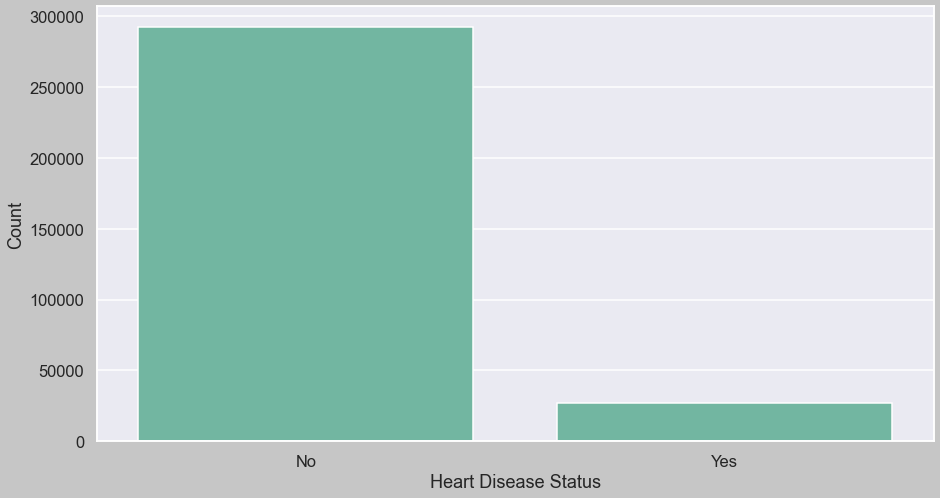

In [108]:
bar = sns.barplot(x=hd_counts_df['Heart Disease Status'], y=hd_counts_df['Count'], color='#66c2a5')
plt.gcf().set_size_inches(15, 8)
plt.show()

## Physical Health Counts and Percentage Bars

In [18]:
# Importing function from a python file
from eda_functions import categorical_percentage_bars

In [19]:
# Creates dataframe that contains the counts of each value for this feature
ph_counts_df = pd.DataFrame.from_dict(Counter(df['PhysicalHealth']), orient='index').reset_index().rename(columns={"index": "Days", 0: "Count"}).sort_values('Days').astype({'Days':'int'})
# Creates dataframe that is like the prior but only counts the values where the participant had heart disease 
ph_heart_disease_counts_df = pd.DataFrame.from_dict(Counter(df[df['HeartDisease']=='Yes']['PhysicalHealth']), orient='index')\
.reset_index().rename(columns={"index": "Days", 0: "HaveHDCount"}).sort_values('Days').astype({'Days':'int'})

ph_counts_df = ph_counts_df.merge(ph_heart_disease_counts_df, how='left', on='Days') # Merges the two dataframes 
# Adds new percentage column of how many people of a certain response have heart disease 
ph_counts_df['Percentage'] = (ph_counts_df['HaveHDCount']/ph_counts_df['Count']) * 100 

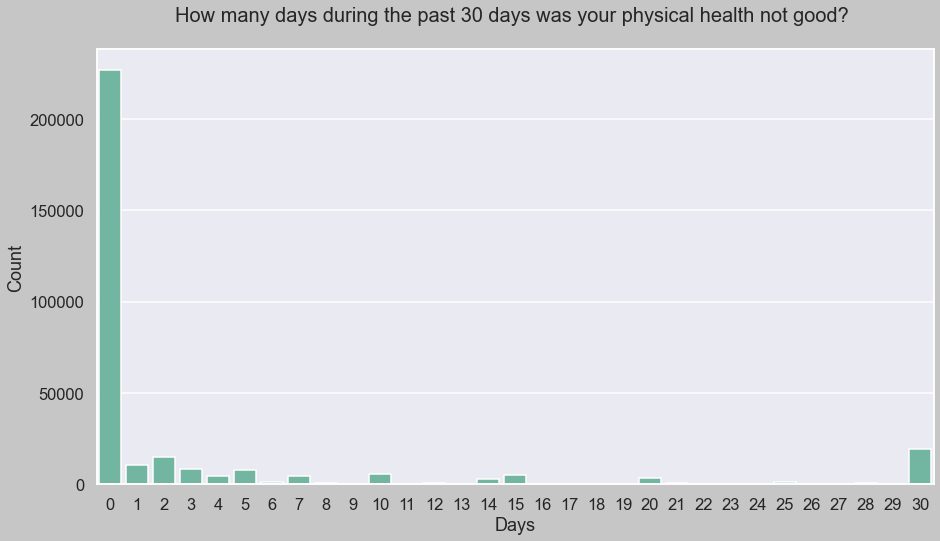

In [20]:
bar = sns.barplot(x=ph_counts_df['Days'], y=ph_counts_df['Count'], color='#66c2a5')
bar.set_title('How many days during the past 30 days was your physical health not good? \n', fontsize = 20)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [99]:
df['PhysicalHealth'].describe()

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

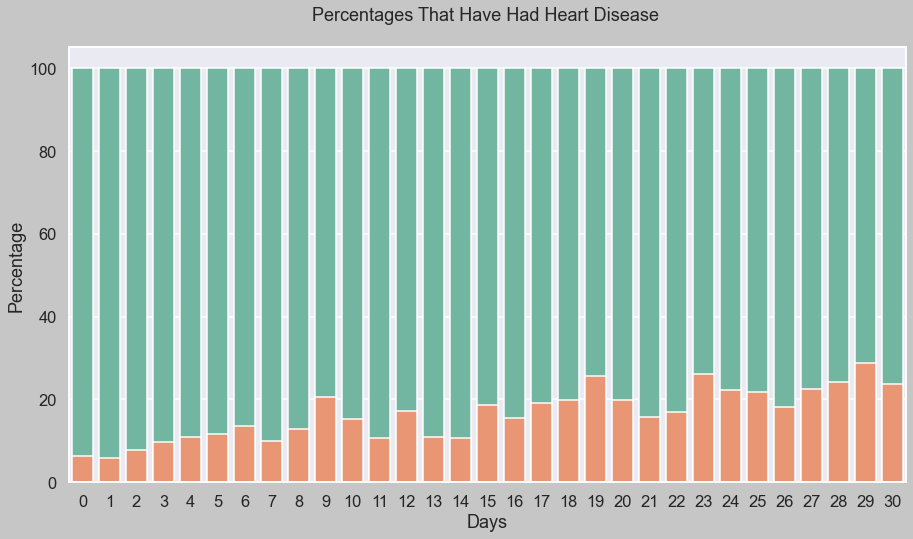

In [21]:
# Refer to 'eda_functions.py' to find this function
categorical_percentage_bars(ph_counts_df, ph_counts_df['Days'], ph_counts_df['Percentage'])

## Mental Health Counts and Percentage Bars

In [22]:
# Creates dataframe that contains the counts of each value for this feature
mh_counts_df = pd.DataFrame.from_dict(Counter(df['MentalHealth']), orient='index').reset_index().rename(columns={"index": "Days", 0: "Count"}).sort_values('Days').astype({'Days':'int'})
# Creates dataframe that is like the prior but only counts the values where the participant had heart disease 
mh_heart_disease_counts_df = pd.DataFrame.from_dict(Counter(df[df['HeartDisease']=='Yes']['MentalHealth']), orient='index')\
.reset_index().rename(columns={"index": "Days", 0: "HaveHDCount"}).sort_values('Days').astype({'Days':'int'})

mh_counts_df = mh_counts_df.merge(mh_heart_disease_counts_df, how='left', on='Days')# Merges the two dataframes 
# Adds new percentage column of how many people of a certain response have heart disease 
mh_counts_df['Percentage'] = (mh_counts_df['HaveHDCount']/mh_counts_df['Count']) * 100

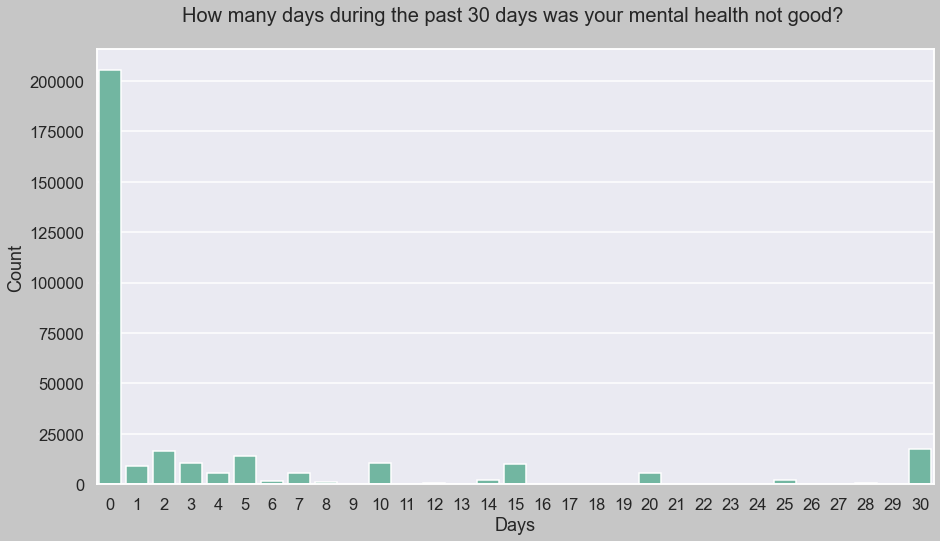

In [23]:
bar = sns.barplot(x=mh_counts_df['Days'], y=mh_counts_df['Count'], color='#66c2a5')
bar.set_title('How many days during the past 30 days was your mental health not good? \n', fontsize = 20)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [100]:
df['MentalHealth'].describe()

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

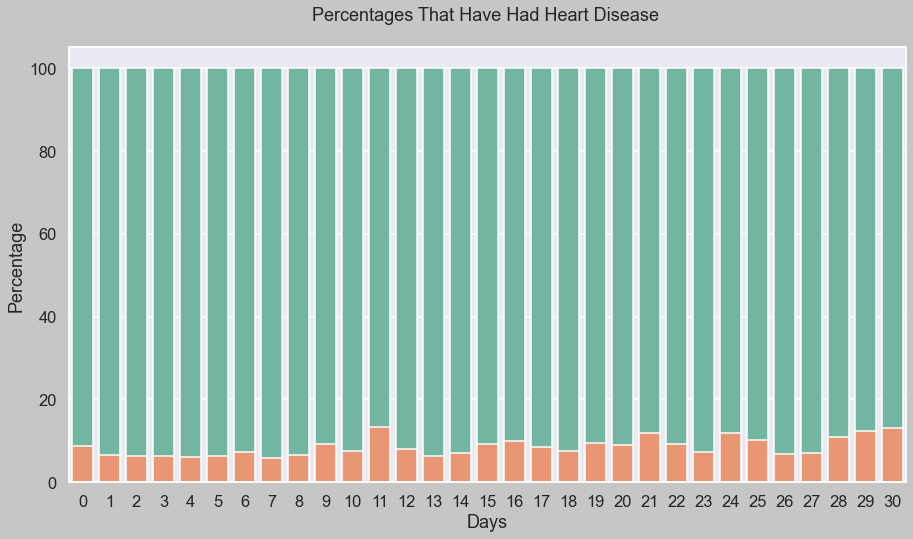

In [24]:
# Refer to 'eda_functions.py' to find this function
categorical_percentage_bars(mh_counts_df, mh_counts_df['Days'], mh_counts_df['Percentage'])

## Sleep Hours Counts and Percentage Bars

In [25]:
# Creates dataframe that contains the counts of each value for this feature
sleep_counts_df = pd.DataFrame.from_dict(Counter(df['SleepTime']), orient='index').reset_index().rename(columns={"index": "Hours", 0: "Count"}).sort_values('Hours').astype({'Hours':'int'})
# Creates dataframe that is like the prior but only counts the values where the participant had heart disease 
sleep_heart_disease_counts_df = pd.DataFrame.from_dict(Counter(df[df['HeartDisease']=='Yes']['SleepTime']), orient='index')\
.reset_index().rename(columns={"index": "Hours", 0: "HaveHDCount"}).sort_values('Hours').astype({'Hours':'int'})

sleep_counts_df = sleep_counts_df.merge(sleep_heart_disease_counts_df, how='left', on='Hours')# Merges the two dataframes 
# Adds new percentage column of how many people of a certain response have heart disease 
sleep_counts_df['Percentage'] = (sleep_counts_df['HaveHDCount']/sleep_counts_df['Count']) * 100

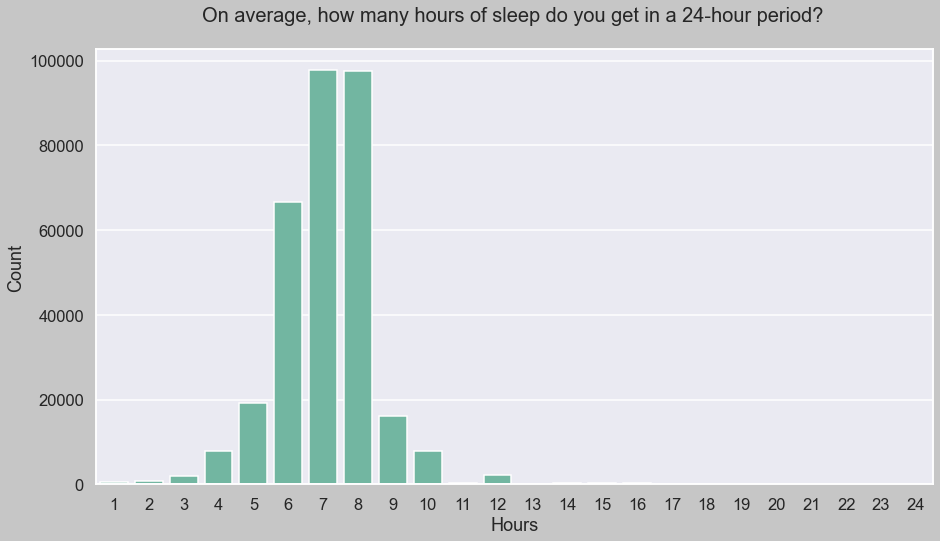

In [26]:
bar = sns.barplot(x=sleep_counts_df['Hours'], y=sleep_counts_df['Count'], color='#66c2a5')
bar.set_title('On average, how many hours of sleep do you get in a 24-hour period? \n', fontsize = 20)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [101]:
df['SleepTime'].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

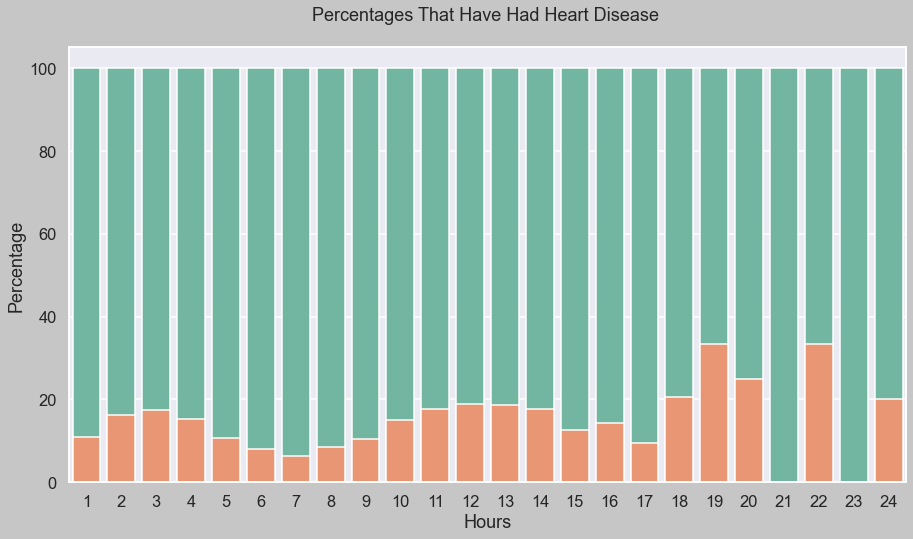

In [27]:
# Refer to 'eda_functions.py' to find this function
categorical_percentage_bars(sleep_counts_df, sleep_counts_df['Hours'], sleep_counts_df['Percentage'])

## Age Counts and Percentage Bars

In [28]:
# Creates dataframe that contains the counts of each value for this feature
age_counts_df = pd.DataFrame.from_dict(Counter(df['AgeCategory']), orient='index').reset_index().rename(columns={"index": "Age", 0: "Count"}).sort_values('Age')
# Creates dataframe that is like the prior but only counts the values where the participant had heart disease 
age_heart_disease_counts_df = pd.DataFrame.from_dict(Counter(df[df['HeartDisease']=='Yes']['AgeCategory']), orient='index')\
.reset_index().rename(columns={"index": "Age", 0: "HaveHDCount"}).sort_values('Age')

age_counts_df = age_counts_df.merge(age_heart_disease_counts_df, how='left', on='Age')# Merges the two dataframes 
# Adds new percentage column of how many people of a certain response have heart disease 
age_counts_df['Percentage'] = (age_counts_df['HaveHDCount']/age_counts_df['Count']) * 100

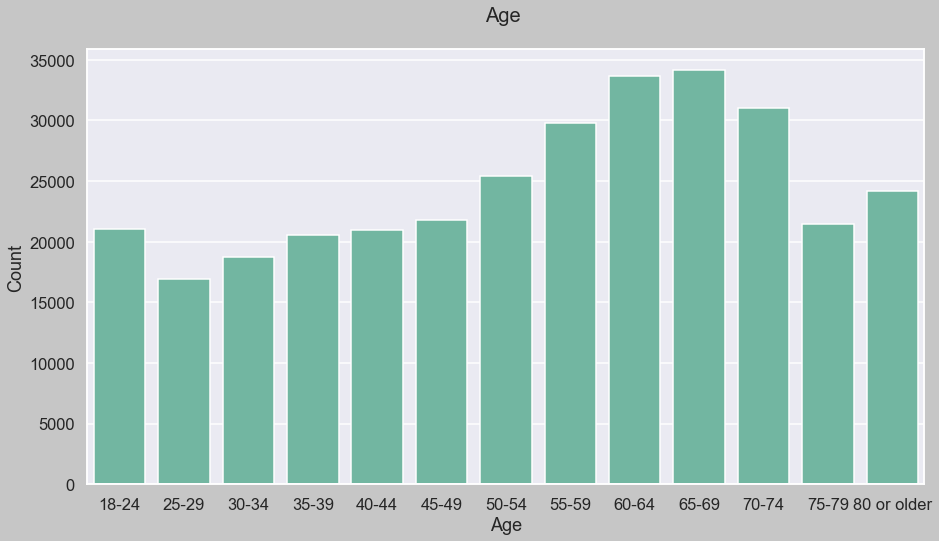

In [29]:
bar = sns.barplot(x=age_counts_df['Age'], y=age_counts_df['Count'], color='#66c2a5')
bar.set_title('Age \n', fontsize = 20)
plt.gcf().set_size_inches(15, 8)
plt.show()

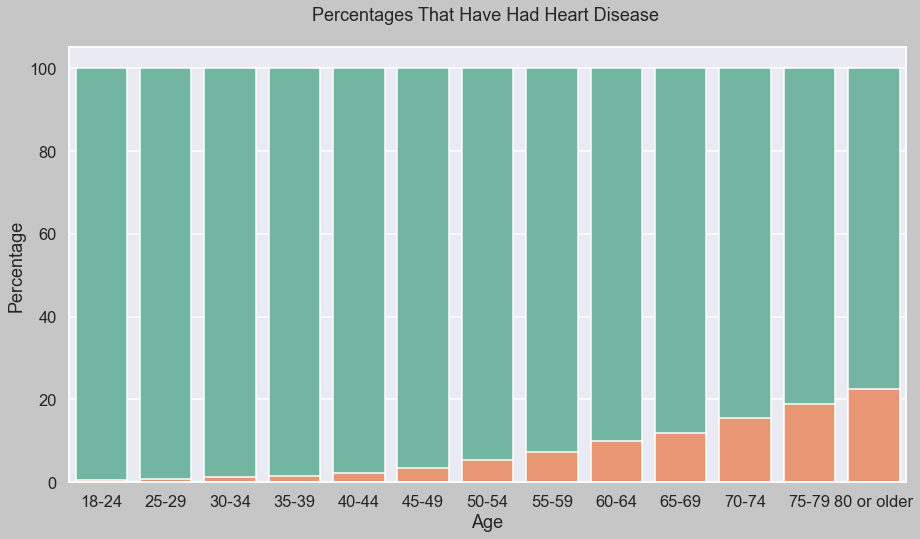

In [30]:
# Refer to 'eda_functions.py' to find this function
categorical_percentage_bars(age_counts_df, age_counts_df['Age'], age_counts_df['Percentage'])

## Race Counts and Percentage Bars

In [31]:
# Creates dataframe that contains the counts of each value for this feature
race_counts_df = pd.DataFrame.from_dict(Counter(df['Race']), orient='index').reset_index().rename(columns={"index": "Race", 0: "Count"})
# Creates dataframe that is like the prior but only counts the values where the participant had heart disease 
race_heart_disease_counts_df = pd.DataFrame.from_dict(Counter(df[df['HeartDisease']=='Yes']['Race']), orient='index')\
.reset_index().rename(columns={"index": "Race", 0: "HaveHDCount"})

race_counts_df = race_counts_df.merge(race_heart_disease_counts_df, how='left', on='Race')# Merges the two dataframes 
# Adds new percentage column of how many people of a certain response have heart disease 
race_counts_df['Percentage'] = (race_counts_df['HaveHDCount']/race_counts_df['Count']) * 100

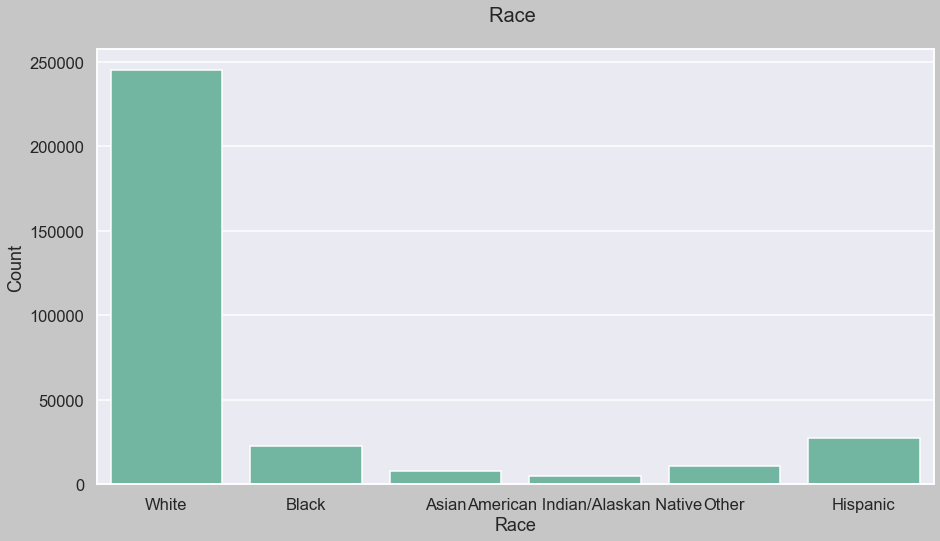

In [32]:
bar = sns.barplot(x=race_counts_df['Race'], y=race_counts_df['Count'], color='#66c2a5')
bar.set_title('Race \n', fontsize = 20)
plt.gcf().set_size_inches(15, 8)
plt.show()

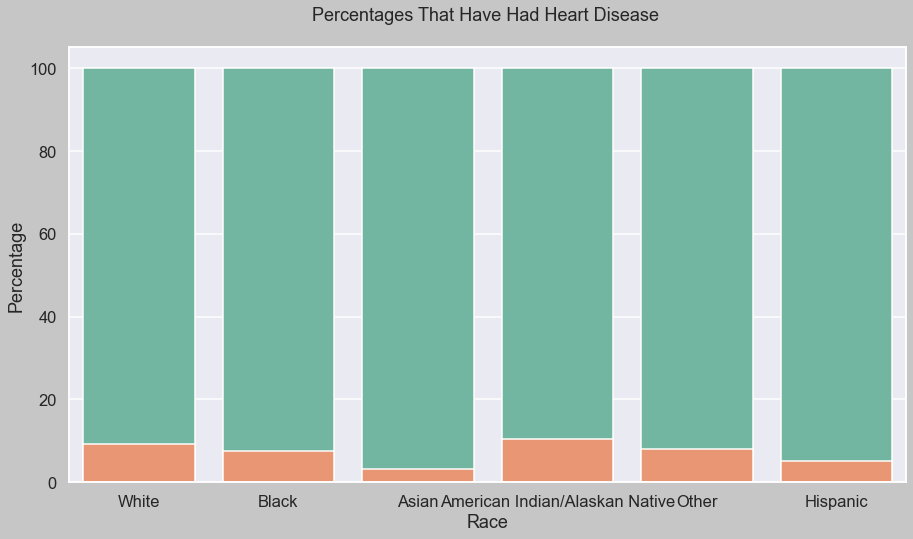

In [33]:
# Refer to 'eda_functions.py' to find this function
categorical_percentage_bars(race_counts_df, race_counts_df['Race'], race_counts_df['Percentage'])

## Diabetic Counts and Percentage Bars

In [34]:
# Creates dataframe that contains the counts of each value for this feature
diabetic_counts_df = pd.DataFrame.from_dict(Counter(df['Diabetic']), orient='index').reset_index().rename(columns={"index": "Diabetic", 0: "Count"})
# Creates dataframe that is like the prior but only counts the values where the participant had heart disease 
diabetic_heart_disease_counts_df = pd.DataFrame.from_dict(Counter(df[df['HeartDisease']=='Yes']['Diabetic']), orient='index')\
.reset_index().rename(columns={"index": "Diabetic", 0: "HaveHDCount"})

diabetic_counts_df = diabetic_counts_df.merge(diabetic_heart_disease_counts_df, how='left', on='Diabetic')# Merges the two dataframes 
# Adds new percentage column of how many people of a certain response have heart disease 
diabetic_counts_df['Percentage'] = (diabetic_counts_df['HaveHDCount']/diabetic_counts_df['Count']) * 100

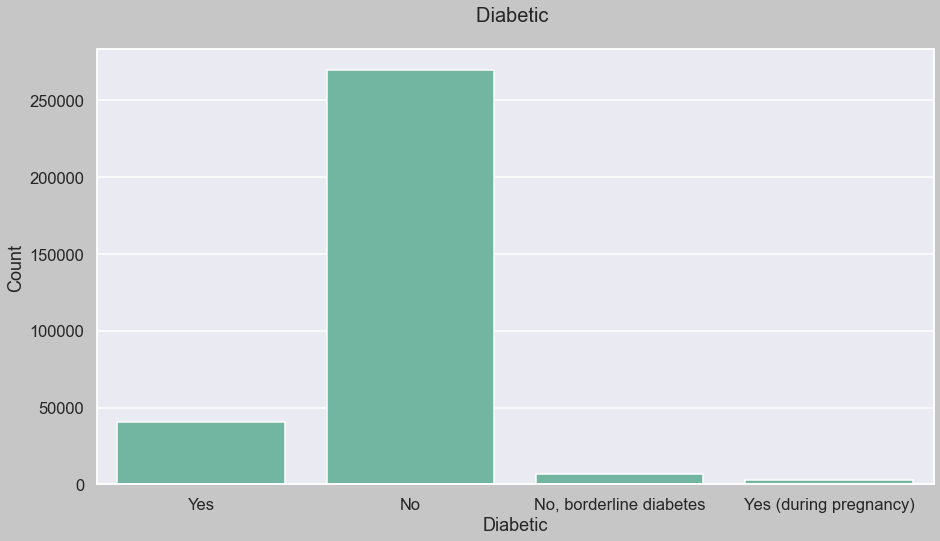

In [35]:
bar = sns.barplot(x=diabetic_counts_df['Diabetic'], y=diabetic_counts_df['Count'], color='#66c2a5')
bar.set_title('Diabetic \n', fontsize = 20)
plt.gcf().set_size_inches(15, 8)
plt.show()

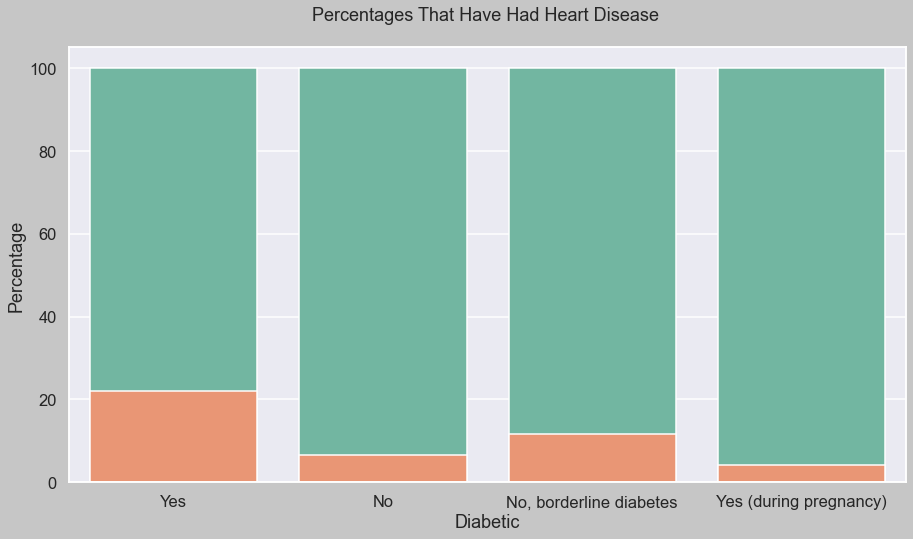

In [36]:
# Refer to 'eda_functions.py' to find this function
categorical_percentage_bars(diabetic_counts_df, diabetic_counts_df['Diabetic'], diabetic_counts_df['Percentage'])

## General Health Counts and Percentage Bars

In [95]:
# Creates dataframe that contains the counts of each value for this feature
health_counts_df = pd.DataFrame.from_dict(Counter(df['GenHealth']), orient='index').reset_index().rename(columns={"index": "GenHealth", 0: "Count"})
# Creates dataframe that is like the prior but only counts the values where the participant had heart disease 
health_heart_disease_counts_df = pd.DataFrame.from_dict(Counter(df[df['HeartDisease']=='Yes']['GenHealth']), orient='index')\
.reset_index().rename(columns={"index": "GenHealth", 0: "HaveHDCount"})

health_counts_df = health_counts_df.merge(health_heart_disease_counts_df, how='left', on='GenHealth')# Merges the two dataframes 
# Adds new percentage column of how many people of a certain response have heart disease 
health_counts_df['Percentage'] = (health_counts_df['HaveHDCount']/health_counts_df['Count']) * 100

# Force custom sort order
health_cat_order = CategoricalDtype(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], ordered=True)
health_counts_df['GenHealth'] = health_counts_df['GenHealth'].astype(health_cat_order)

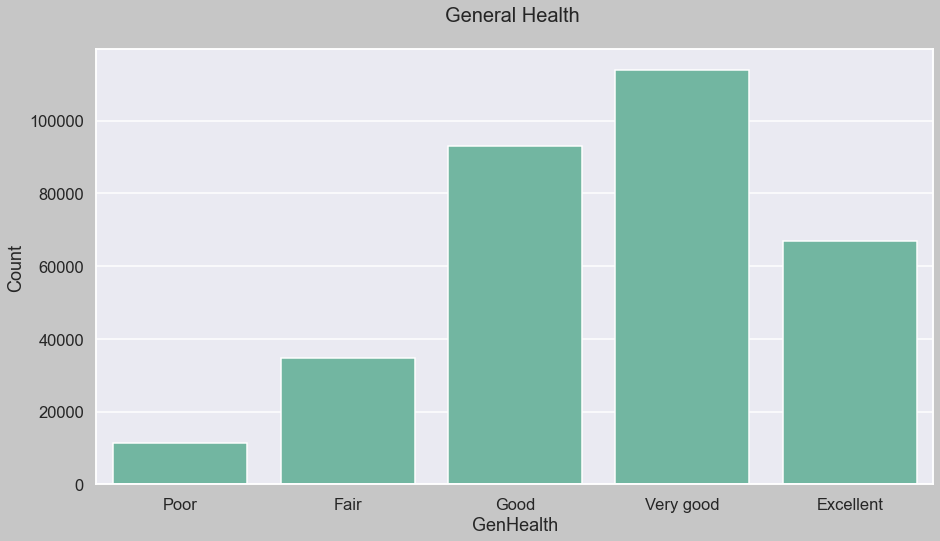

In [96]:
bar = sns.barplot(x=health_counts_df['GenHealth'], y=health_counts_df['Count'], color='#66c2a5')
bar.set_title('General Health \n', fontsize = 20)
plt.gcf().set_size_inches(15, 8)
plt.show()

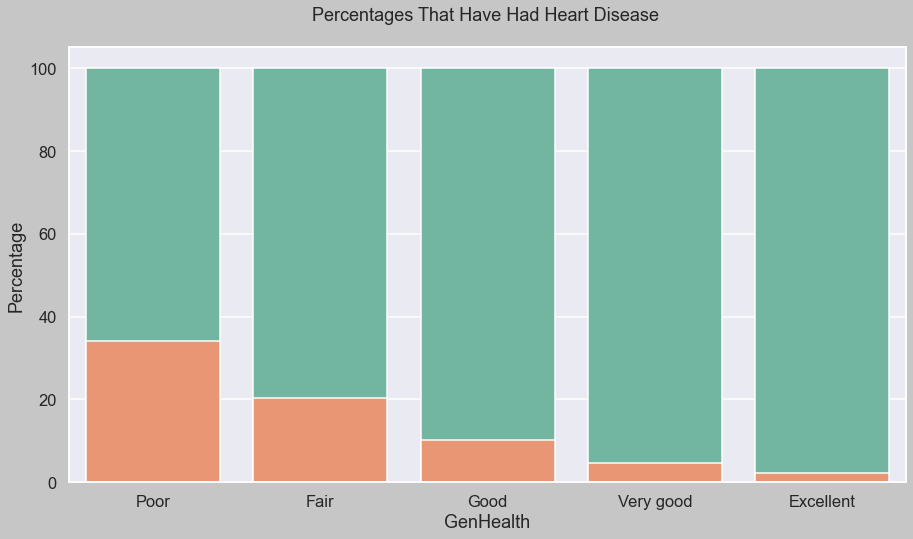

In [97]:
# Refer to 'eda_functions.py' to find this function
categorical_percentage_bars(health_counts_df, health_counts_df['GenHealth'], health_counts_df['Percentage'])

## Smoking Bar and Pie

In [40]:
from eda_functions import binary_heart_disease_pies, binary_heart_disease_bars

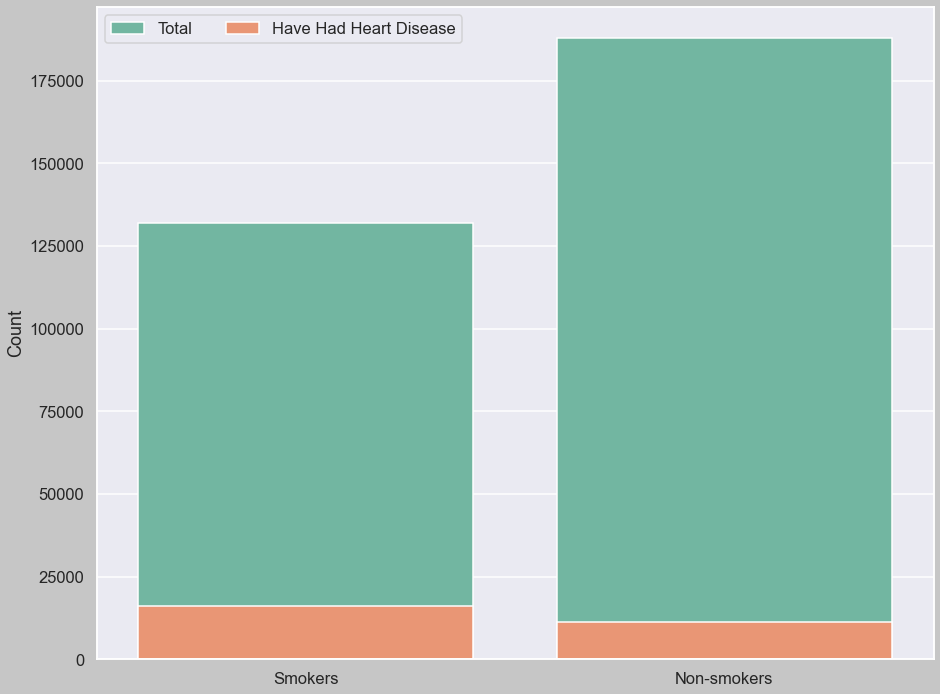

In [41]:
smoking_x_labels = ['Smokers', 'Non-smokers']
# Refer to 'eda_functions.py' to find this function
yes_smoking_sizes, no_smoking_sizes = binary_heart_disease_bars(df,'Smoking', smoking_x_labels)

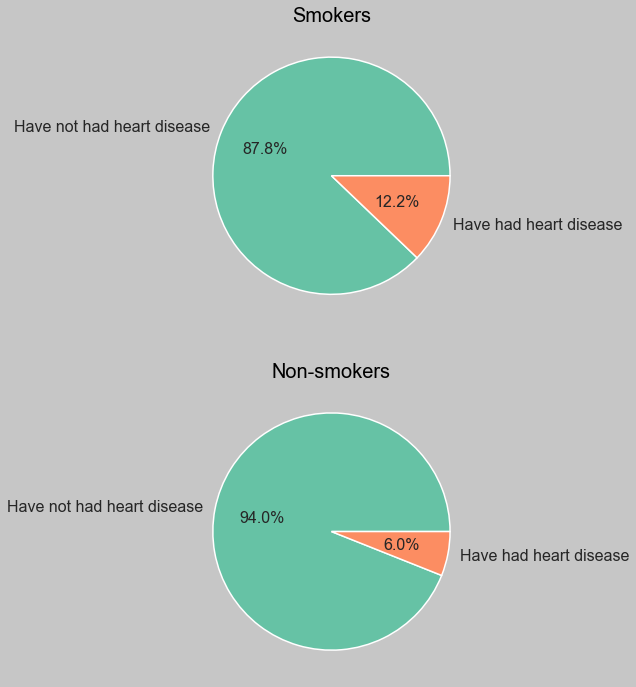

In [42]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(smoking_x_labels, yes_smoking_sizes, no_smoking_sizes)

## Drinking Bar and Pie

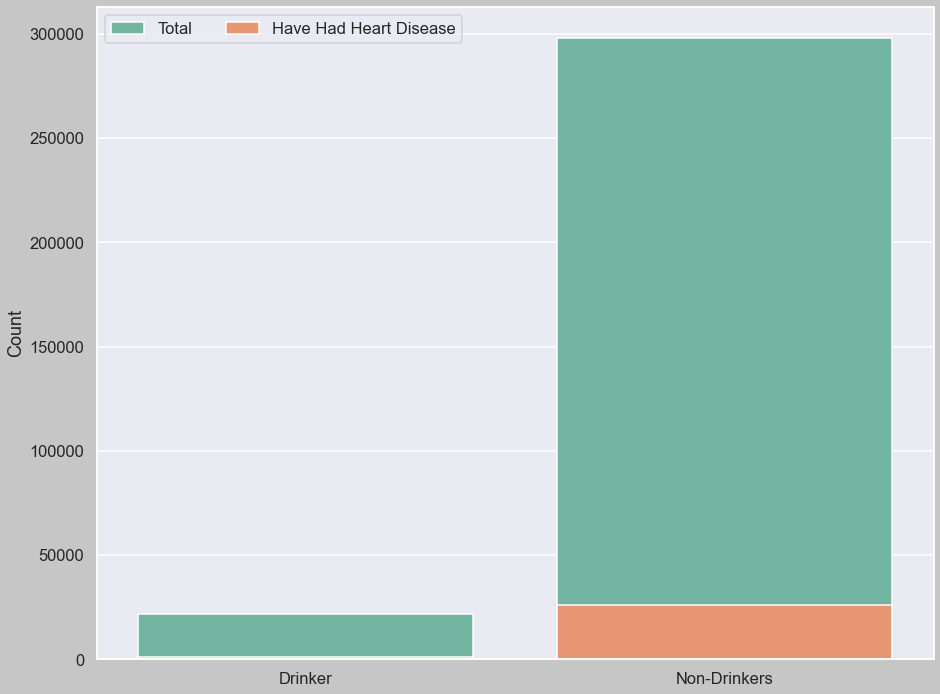

In [43]:
alcohol_x_labels = ['Drinker', 'Non-Drinkers']
# Refer to 'eda_functions.py' to find this function
yes_alcohol_sizes, no_alcohol_sizes = binary_heart_disease_bars(df,'AlcoholDrinking', alcohol_x_labels)

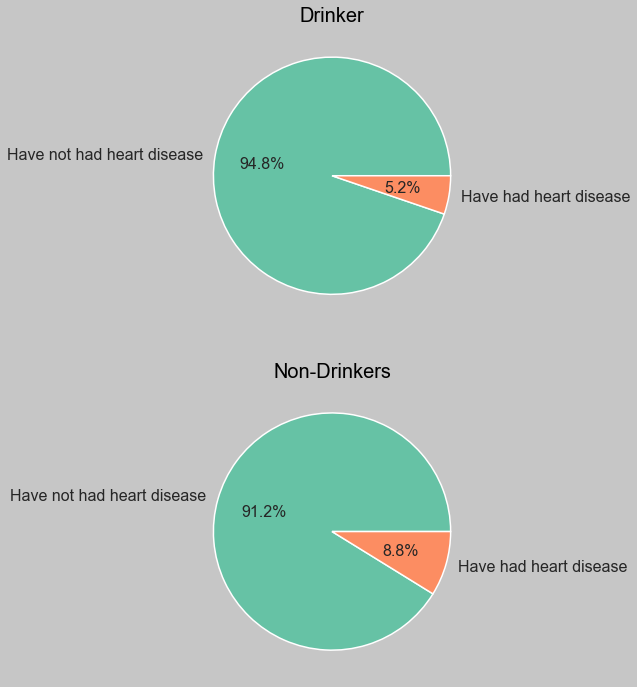

In [44]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(alcohol_x_labels, yes_alcohol_sizes, no_alcohol_sizes)

## Stroke Bar and Pie

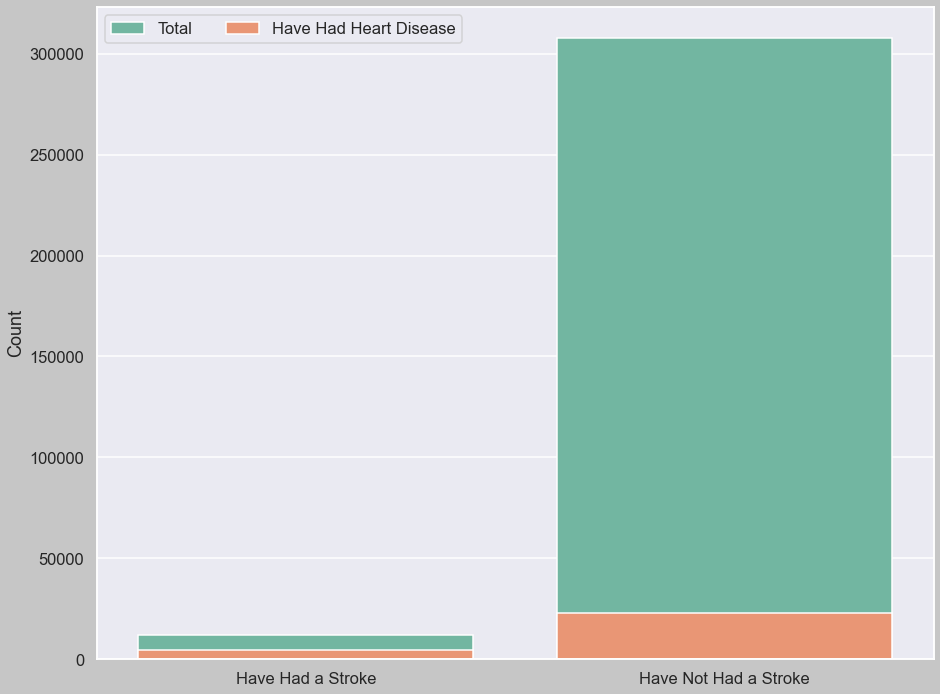

In [45]:
stroke_x_labels = ['Have Had a Stroke', 'Have Not Had a Stroke']
# Refer to 'eda_functions.py' to find this function
yes_stroke_sizes, no_stroke_sizes = binary_heart_disease_bars(df,'Stroke', stroke_x_labels)

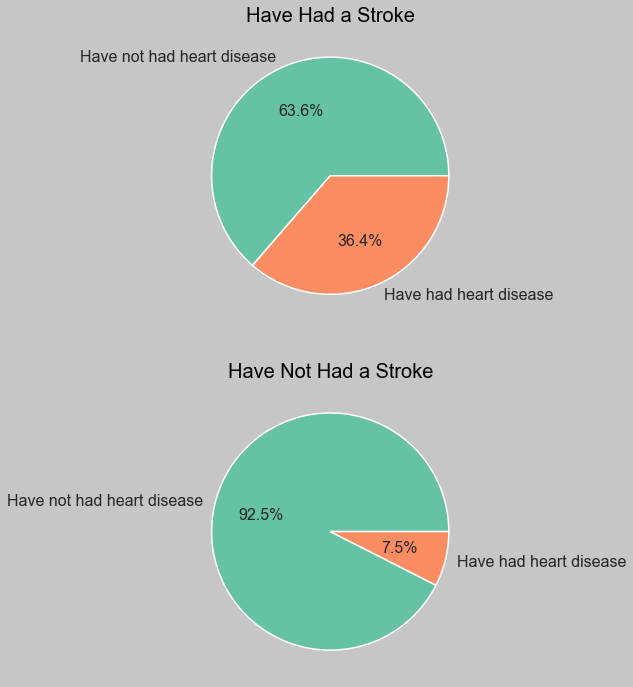

In [46]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(stroke_x_labels, yes_stroke_sizes, no_stroke_sizes)

## Difficulty Walking Bar and Pie

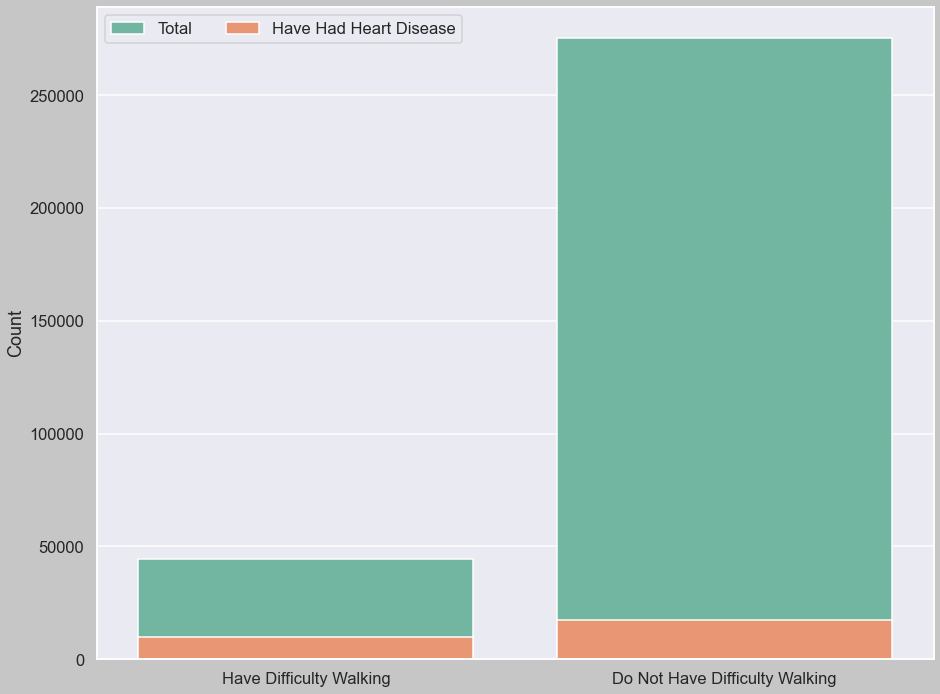

In [47]:
diff_walking_x_labels = ['Have Difficulty Walking', 'Do Not Have Difficulty Walking']
# Refer to 'eda_functions.py' to find this function
yes_diff_walking_sizes, no_diff_walking_sizes = binary_heart_disease_bars(df,'DiffWalking', diff_walking_x_labels)

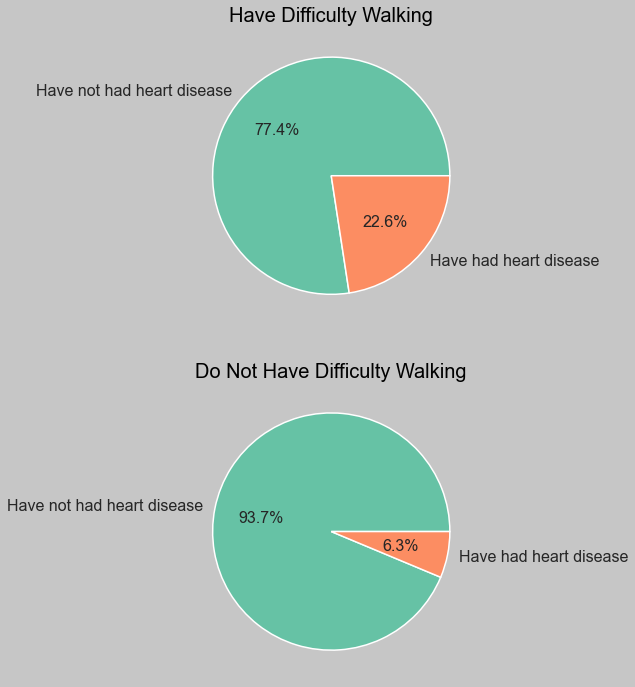

In [48]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(diff_walking_x_labels, yes_diff_walking_sizes, no_diff_walking_sizes)

## Sex Bar and Pie

In [49]:
sex_partial_df = df[['HeartDisease','Sex']]

male_df = sex_partial_df[sex_partial_df['Sex'] == 'Male']
heart_disease_male_counts = Counter(male_df['HeartDisease'])

female_df = sex_partial_df[sex_partial_df['Sex'] == 'Female']
heart_disease_female_counts = Counter(female_df['HeartDisease'])

In [50]:
x = ['Male', 'Female']
y = [len(male_df),len(female_df)] 
y1 = [heart_disease_male_counts['Yes'],heart_disease_female_counts['Yes']]

[Text(0, 0.5, 'Count')]

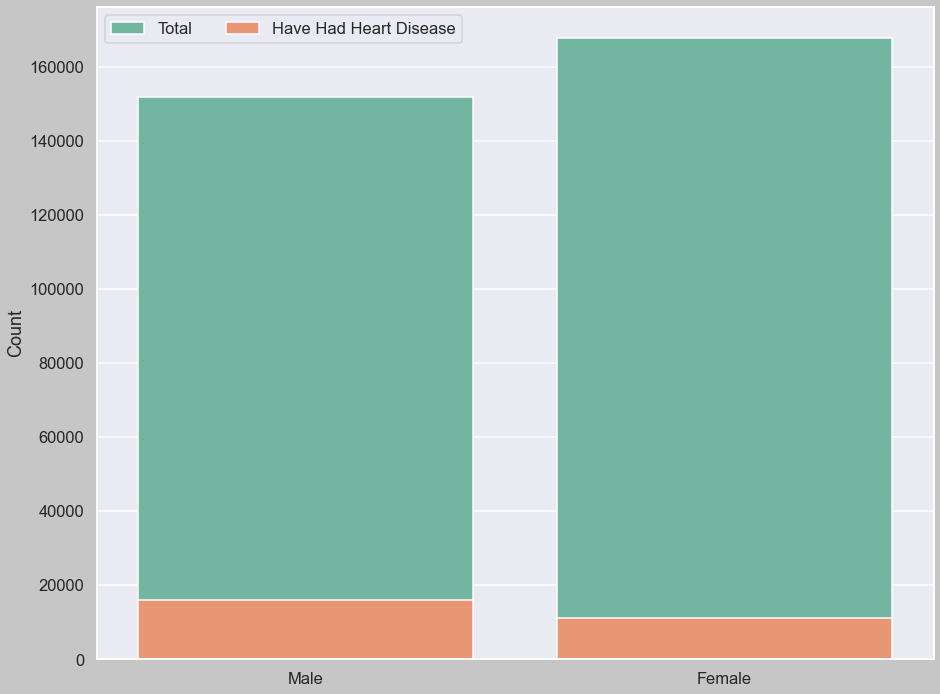

In [51]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=x, y=y, label='Total', color='#66c2a5')
sns.barplot(x=x, y=y1, label='Have Had Heart Disease', color='#fc8d62')
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel='Count')

In [52]:
male_sizes = [heart_disease_male_counts['No'], heart_disease_male_counts['Yes']]
female_sizes = [heart_disease_female_counts['No'], heart_disease_female_counts['Yes']]

sex_titles_lst = ['Male', 'Female']

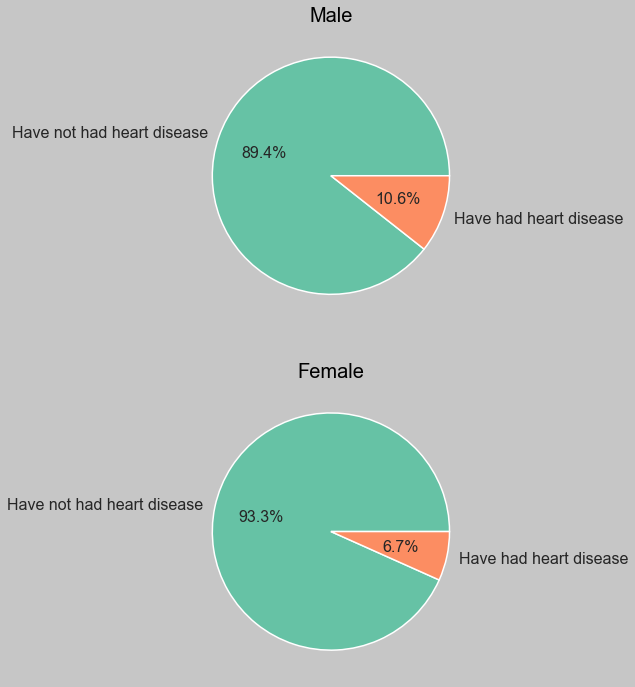

In [53]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(sex_titles_lst, male_sizes, female_sizes)

## Physical Activity Bar and Pie

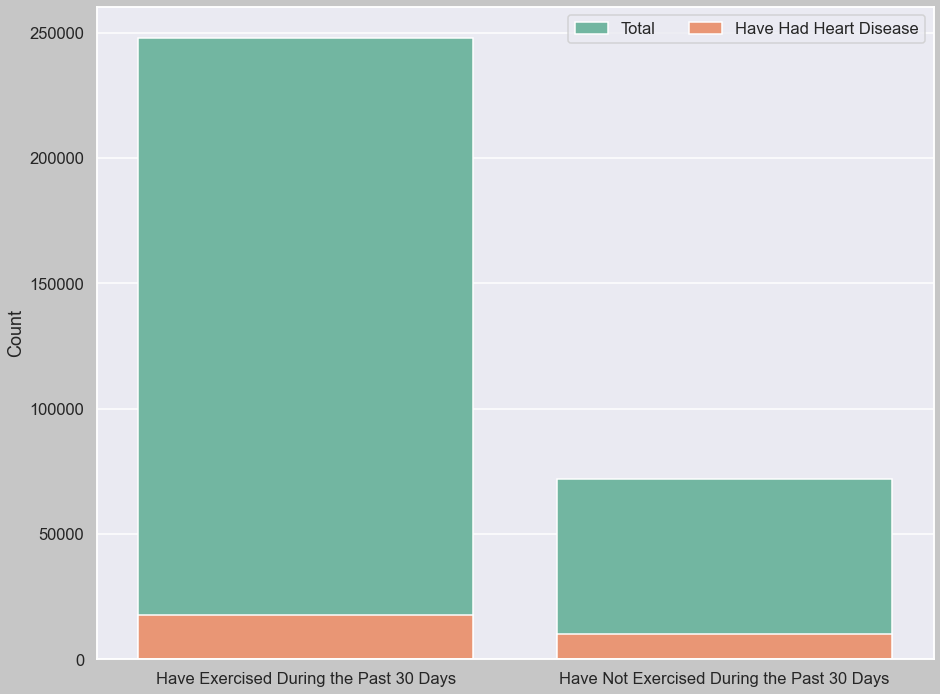

In [54]:
activity_x_labels = ['Have Exercised During the Past 30 Days', 'Have Not Exercised During the Past 30 Days']
# Refer to 'eda_functions.py' to find this function
yes_activity_sizes, no_activity_sizes = binary_heart_disease_bars(df,'PhysicalActivity', activity_x_labels, 'upper right')

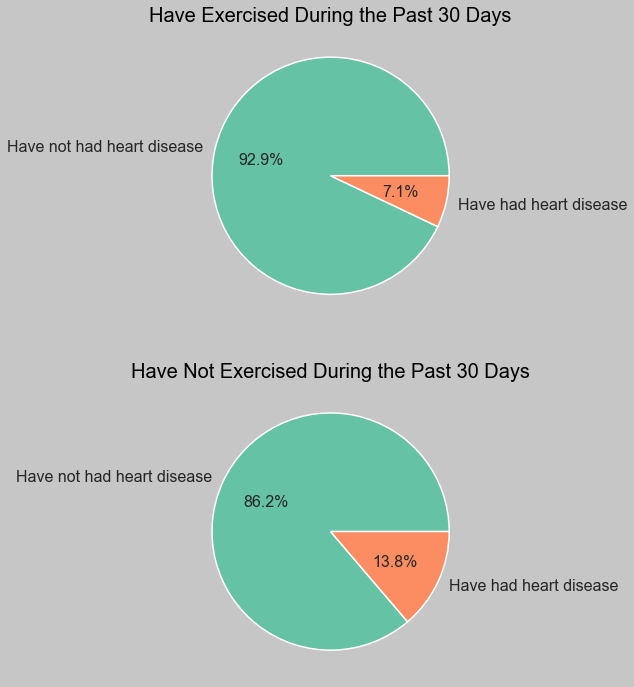

In [55]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(activity_x_labels, yes_activity_sizes, no_activity_sizes)

## Asthma Activity Bar and Pie

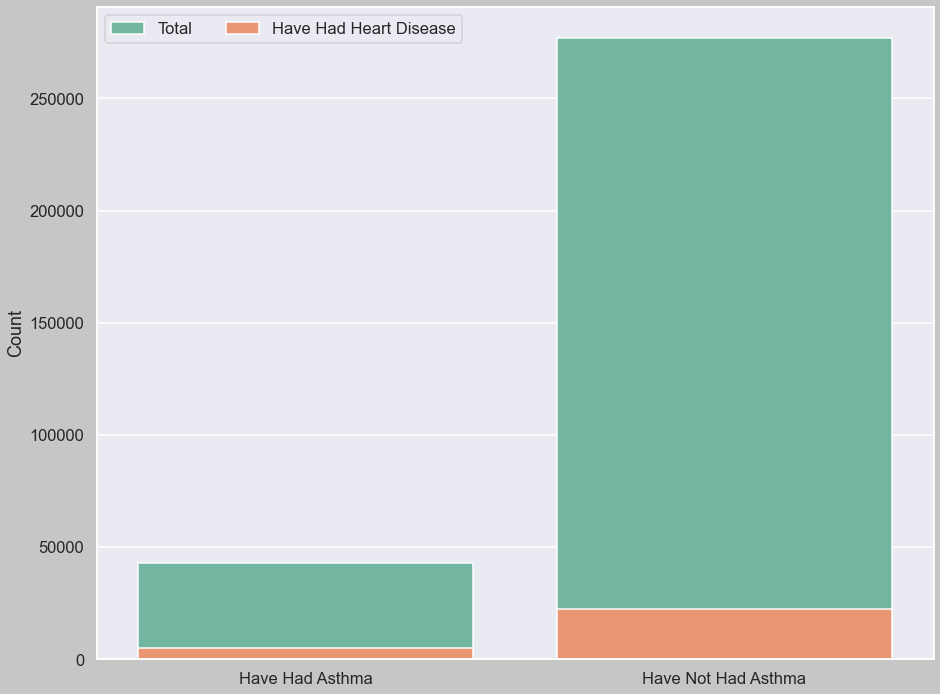

In [56]:
asthma_x_labels = ['Have Had Asthma', 'Have Not Had Asthma']
# Refer to 'eda_functions.py' to find this function
yes_asthma_sizes, no_asthma_sizes = binary_heart_disease_bars(df,'Asthma', asthma_x_labels)

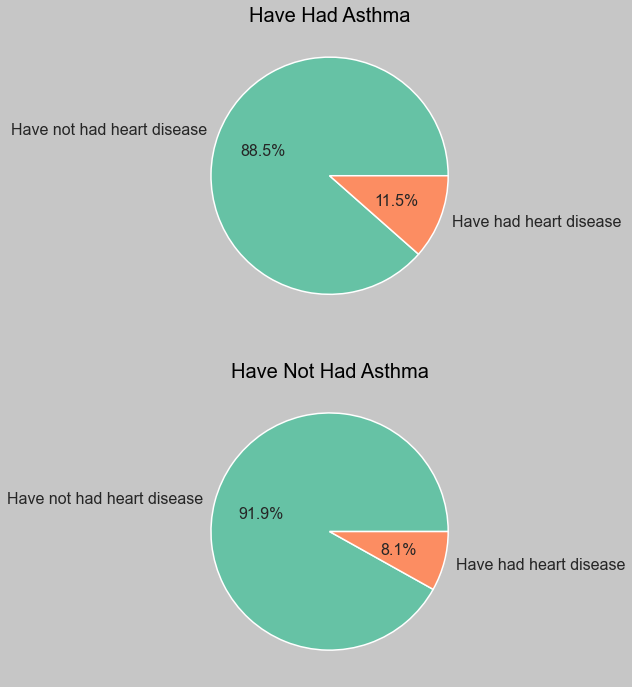

In [57]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(asthma_x_labels, yes_asthma_sizes, no_asthma_sizes)

## Kidney Disease Activity Bar and Pie

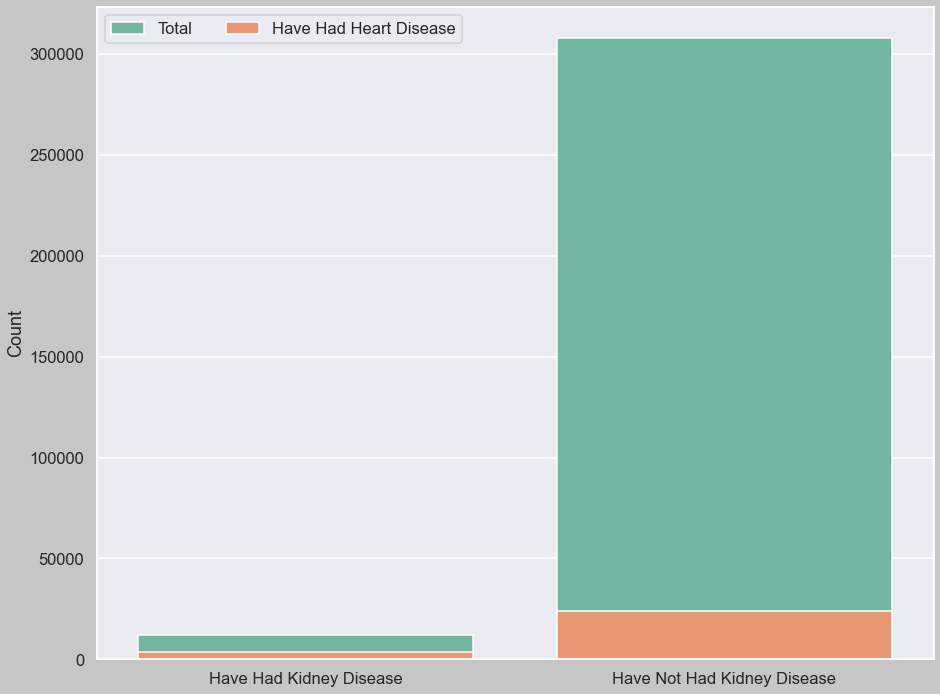

In [58]:
kidney_disease_x_labels = ['Have Had Kidney Disease', 'Have Not Had Kidney Disease']
# Refer to 'eda_functions.py' to find this function
yes_kidney_disease_sizes, no_kidney_disease_sizes = binary_heart_disease_bars(df,'KidneyDisease', kidney_disease_x_labels)

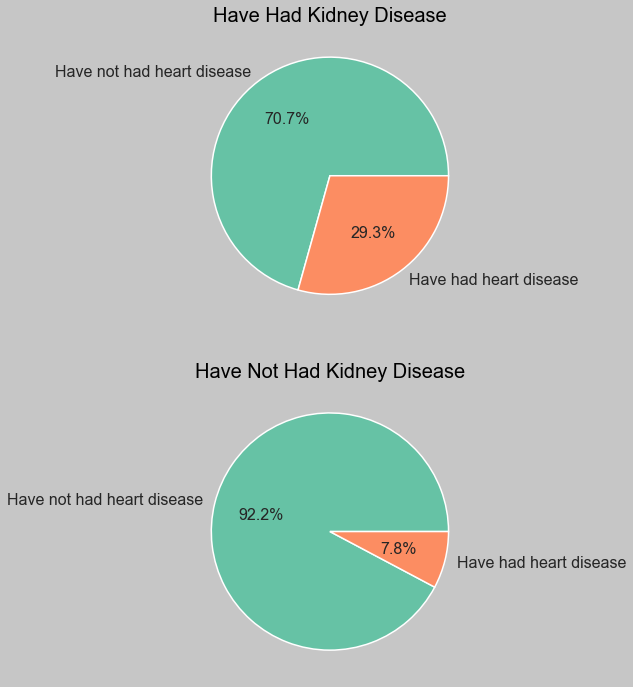

In [59]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(kidney_disease_x_labels, yes_kidney_disease_sizes, no_kidney_disease_sizes)

## Skin Cancer Activity Bar and Pie

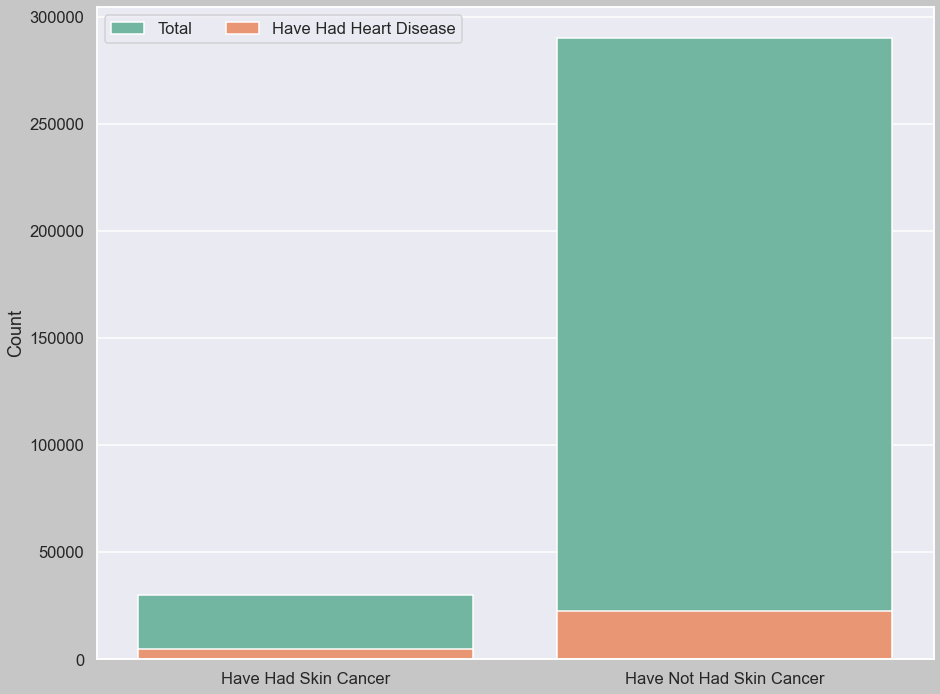

In [60]:
skin_cancer_x_labels = ['Have Had Skin Cancer', 'Have Not Had Skin Cancer']
# Refer to 'eda_functions.py' to find this function
yes_skin_cancer_sizes, no_skin_cancer_sizes = binary_heart_disease_bars(df,'SkinCancer', skin_cancer_x_labels)

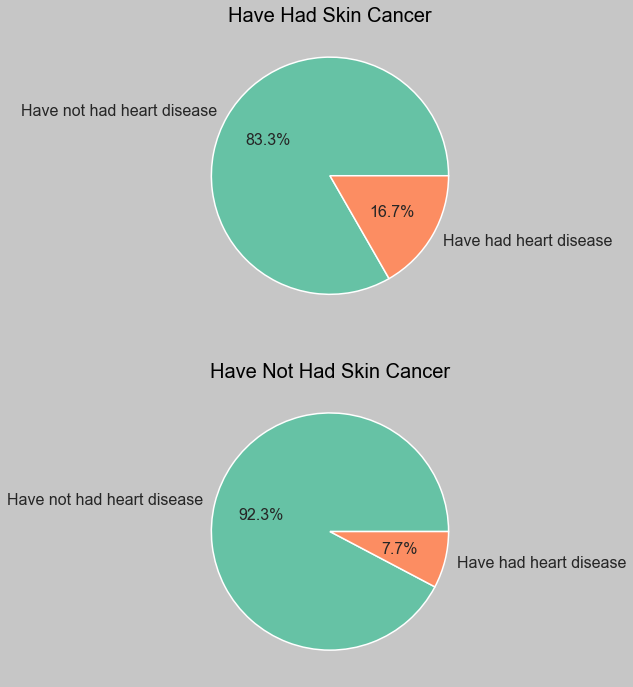

In [61]:
# Refer to 'eda_functions.py' to find this function
binary_heart_disease_pies(skin_cancer_x_labels, yes_skin_cancer_sizes, no_skin_cancer_sizes)

In [64]:
# List of categorical column names
cat_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [65]:
# Convert the values of each column to numerical categories and store them in a dictionary
factorized_columns = {}
for col in cat_columns:
    factorized_columns[col] = df[col].factorize()[0]
    
factorized_df = pd.DataFrame(data=factorized_columns) # Turn dictionary into dataframe

In [67]:
factorized_df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,1,0,0,1,0,1
2,0,0,0,0,0,1,2,0,0,0,1,0,0,1
3,0,1,0,0,0,0,3,0,1,1,2,1,0,0
4,0,1,0,0,1,0,4,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0,0,0,1,1,6,5,0,1,1,0,0,1
319791,0,0,0,0,0,1,10,5,1,0,0,0,0,1
319792,0,1,0,0,0,0,8,5,1,0,2,1,0,1
319793,0,1,0,0,0,0,12,5,1,1,2,1,0,1


In [68]:
# Initialize empty dataframe
chi_p_df = pd.DataFrame(data=[(0 for i in range(len(cat_columns))) for i in range(len(cat_columns))], columns=cat_columns)
chi_p_df.set_index(pd.Index(cat_columns), inplace = True)

# Iterate over feature pairs, perform a chi square test on each pair, and insert the respective p-values into a data frame 
for i in list(cat_columns):
    for j in list(cat_columns):
        if i != j:
            p_val = chi2(np.array(factorized_df[i]).reshape(-1, 1), np.array(factorized_df[j]).reshape(-1, 1))[1]
            chi_p_df.loc[i,j] = p_val

In [69]:
chi_p_df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
HeartDisease,0.000000e+00,0.000000e+00,2.061600e-67,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.289581e-164,0.000000e+00,0.000000e+00,0.000000e+00,3.049596e-111,0.000000e+00,0.000000e+00
Smoking,0.000000e+00,0.000000e+00,0.000000e+00,1.514702e-109,0.000000e+00,1.610741e-209,0.000000e+00,0.000000e+00,1.021674e-100,7.605991e-273,0.000000e+00,1.778124e-18,7.390709e-37,5.495404e-35
AlcoholDrinking,1.147059e-68,0.000000e+00,0.000000e+00,2.209227e-27,7.083915e-83,2.185372e-02,2.582194e-305,3.296490e-103,1.322900e-229,1.343811e-21,1.501470e-59,2.293058e-01,9.032429e-54,1.852070e-03
Stroke,0.000000e+00,7.590788e-253,3.207036e-28,0.000000e+00,0.000000e+00,8.639975e-02,0.000000e+00,1.126141e-108,0.000000e+00,0.000000e+00,0.000000e+00,4.244376e-103,0.000000e+00,5.911723e-157
DiffWalking,0.000000e+00,0.000000e+00,1.002431e-76,0.000000e+00,0.000000e+00,6.280103e-286,0.000000e+00,2.354202e-220,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.073122e-254
Sex,4.886453e-181,5.846309e-266,8.533311e-02,2.054343e-01,4.713328e-175,0.000000e+00,1.776384e-191,1.962735e-57,9.493421e-278,6.098160e-87,1.966759e-33,1.007862e-176,1.983470e-04,3.733339e-08
AgeCategory,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Race,0.000000e+00,0.000000e+00,1.499016e-105,8.620481e-62,1.348637e-01,4.734316e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.274409e-94,3.825989e-28,0.000000e+00
Diabetic,1.357900e-288,1.067882e-30,2.852887e-25,1.259831e-97,0.000000e+00,1.639588e-41,0.000000e+00,1.035035e-30,0.000000e+00,1.174958e-154,0.000000e+00,2.206971e-09,1.717457e-205,1.222047e-15
PhysicalActivity,0.000000e+00,0.000000e+00,3.101241e-18,0.000000e+00,0.000000e+00,1.536871e-127,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.474038e-95,0.000000e+00,5.084924e-01


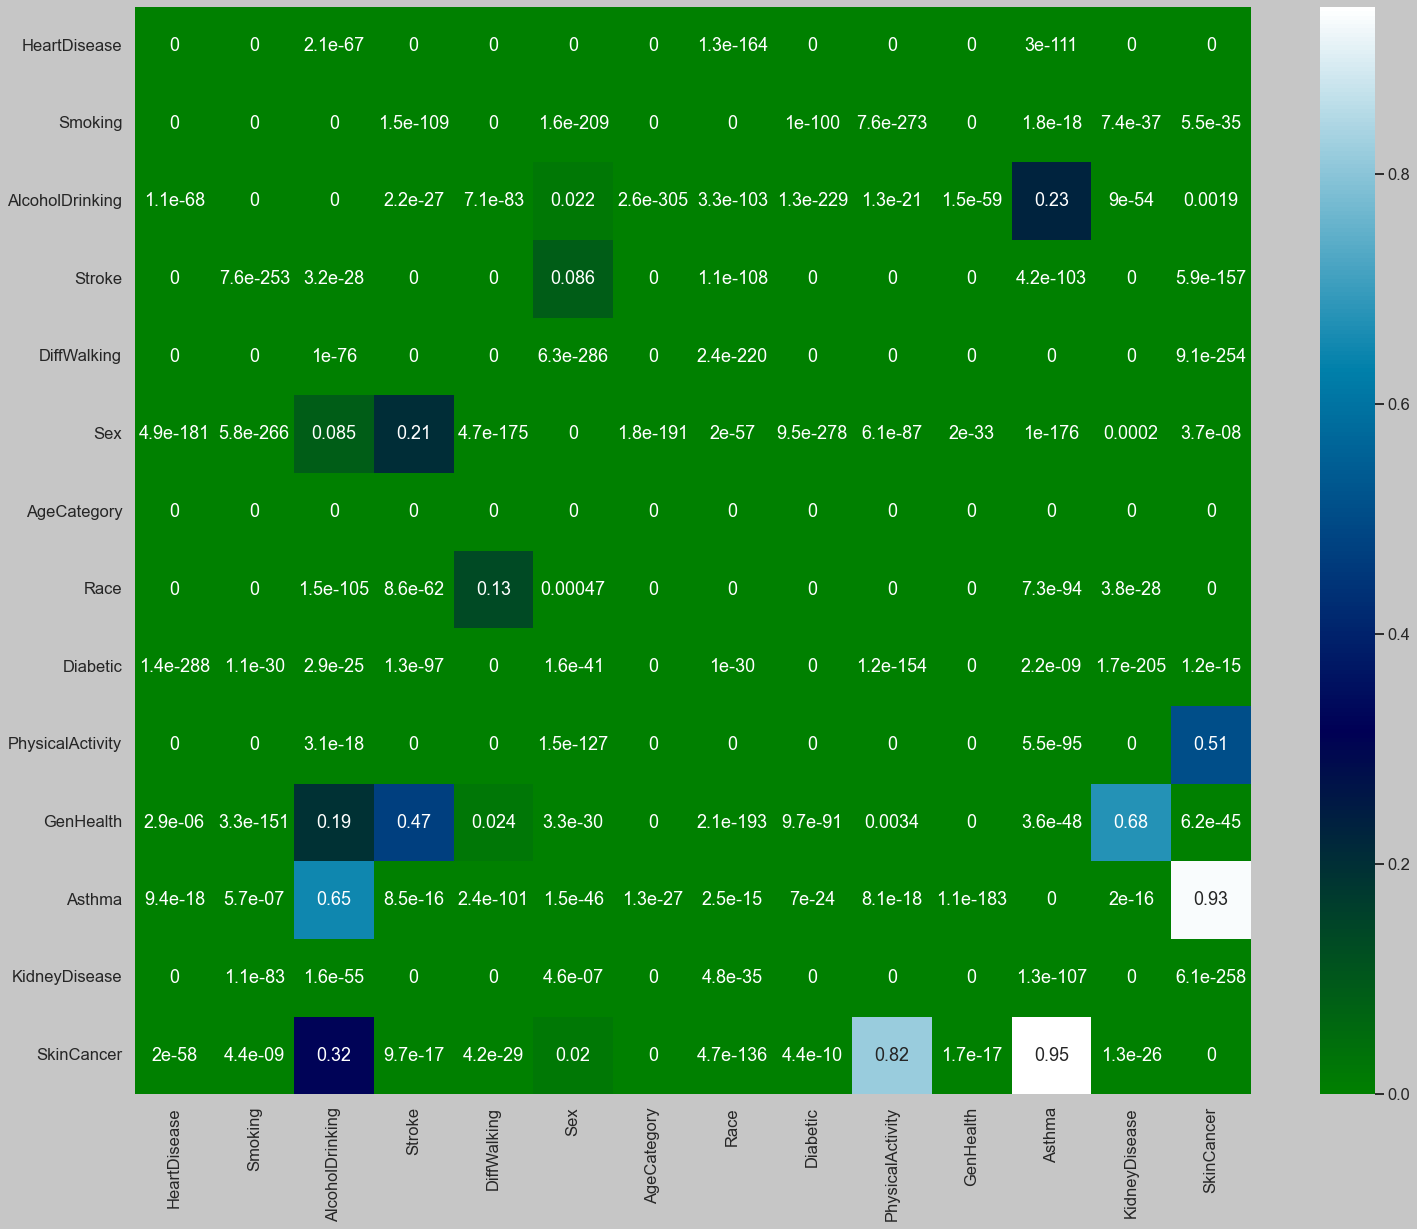

In [76]:
sns.heatmap(chi_p_df, annot=True, cmap="ocean", yticklabels=True)
plt.gcf().set_size_inches(25, 20)